In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("final_cleaned_data.csv", sep = ';' )
df.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Loudness_norm
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5.176,0.033,0.483,0.000,...,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,0.849862
1,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4.019,0.061,0.143,0.629,...,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,0.883423
2,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5.678,0.333,0.213,0.000,...,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,0.835301
3,4,Cupid - Twin Ver.,FIFTY FIFTY,2023-05-29,0.783,0.592,-8.332,0.033,0.435,0.000,...,Artist 1,FIFTY FIFTY,Nationality 1,South Korea,Asia,197,197.0,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,0.758318
4,5,un x100to,"Grupo Frontera, Bad Bunny",2023-05-29,0.569,0.724,-4.076,0.047,0.228,0.000,...,Artist 1,Grupo Frontera,Nationality 1,Mexico,Latin-America,196,98.0,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,0.881769


In [6]:
# Check the column names in the dataframe
print(df.columns.tolist())
print(f"\nDataframe shape: {df.shape}")

['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality', 'Nationality', 'Continent', 'Points (Total)', 'Points (Ind for each Artist/Nat)', 'id', 'Song URL', 'Loudness_norm']

Dataframe shape: (467061, 21)


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467061 entries, 0 to 467060
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Rank                              467061 non-null  int64         
 1   Title                             467061 non-null  object        
 2   Artists                           467061 non-null  object        
 3   Date                              467061 non-null  datetime64[ns]
 4   Danceability                      467061 non-null  float64       
 5   Energy                            467061 non-null  float64       
 6   Loudness                          467061 non-null  float64       
 7   Speechiness                       467061 non-null  float64       
 8   Acousticness                      467061 non-null  float64       
 9   Instrumentalness                  467061 non-null  float64       
 10  Valence                         

In [ ]:
# Step 1: Aggregate data by song
song_stats = df.groupby(['id']).agg({
    'Rank': 'min',
    'Date': 'nunique'
}).reset_index()
song_stats.columns = ['id', 'best_rank', 'days_on_chart']

# Convert days to weeks
song_stats['weeks_on_chart'] = (song_stats['days_on_chart'] / 7).round().astype(int)

# Step 2: Calculate scores on aggregated data
song_stats['peak_score'] = ((201 - song_stats['best_rank']) / 200) * 100
song_stats['longevity_score'] = np.minimum(song_stats['weeks_on_chart'] / 20, 1.0) * 100

# Step 3: Calculate popularity score
weight_peak = 0.5
weight_longevity = 0.6
song_stats['popularity_score'] = (weight_peak * song_stats['peak_score']) + (weight_longevity * song_stats['longevity_score'])

# Step 4: Create labels on unique songs
#threshold = song_stats['popularity_score'].median()
threshold = song_stats['popularity_score'].quantile(0.7)
song_stats['popularity_label'] = song_stats['popularity_score'].apply(lambda x: 'Popular' if x >= threshold else 'Not Popular')

# Display statistics
print(f"Total unique songs: {len(song_stats)}")
print(f"Threshold: {threshold:.2f}")
print("\nLabel distribution:")
print(song_stats['popularity_label'].value_counts())
print(f"\nPercentage:")
print(song_stats['popularity_label'].value_counts(normalize=True) * 100)

song_stats.head()

Total unique songs: 9161
Threshold: 52.25

Label distribution:
popularity_label
Not Popular    6406
Popular        2755
Name: count, dtype: int64

Percentage:
popularity_label
Not Popular    69.926864
Popular        30.073136
Name: proportion, dtype: float64


,id,best_rank,days_on_chart,weeks_on_chart,peak_score,longevity_score,popularity_score,popularity_label
0,000xQL6tZNLJzIrtIgxqSl,40,118,17,80.5,85.0,91.25,Popular
1,003VDDA7J3Xb2ZFlNx7nIZ,108,2,0,46.5,0.0,23.25,Not Popular
2,003eoIwxETJujVWmNFMoZy,91,14,2,55.0,10.0,33.50,Not Popular
3,003vvx7Niy0yvhvHt4a68B,73,560,80,64.0,100.0,92.00,Popular
4,00B7TZ0Xawar6NZ00JFomN,61,14,2,70.0,10.0,41.00,Not Popular


In [12]:
song_stats

,id,best_rank,weeks_on_chart,peak_score,longevity_score,popularity_score,popularity_label
0,000xQL6tZNLJzIrtIgxqSl,40,118,80.5,100.0,80.25,Popular
1,003VDDA7J3Xb2ZFlNx7nIZ,108,2,46.5,10.0,27.25,Not Popular
2,003eoIwxETJujVWmNFMoZy,91,14,55.0,70.0,55.50,Not Popular
3,003vvx7Niy0yvhvHt4a68B,73,560,64.0,100.0,72.00,Popular
4,00B7TZ0Xawar6NZ00JFomN,61,14,70.0,70.0,63.00,Not Popular
...,...,...,...,...,...,...,...
9156,7zjEyeBsaw9gV0jofJLfOM,97,8,52.0,40.0,42.00,Not Popular
9157,7zl7kehxesNEo2pYkKXTSe,112,4,44.5,20.0,30.25,Not Popular
9158,7znO2T2deQ7nZUbyxEAMDB,140,1,30.5,5.0,17.25,Not Popular
9159,7zvfDihYiJ8RQ1nRcpKBF5,23,8,89.0,40.0,60.50,Not Popular


In [7]:
df.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Loudness_norm
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5.176,0.033,0.483,0.000,...,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,0.849862
1,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4.019,0.061,0.143,0.629,...,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,0.883423
2,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5.678,0.333,0.213,0.000,...,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,0.835301
3,4,Cupid - Twin Ver.,FIFTY FIFTY,2023-05-29,0.783,0.592,-8.332,0.033,0.435,0.000,...,Artist 1,FIFTY FIFTY,Nationality 1,South Korea,Asia,197,197.0,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,0.758318
4,5,un x100to,"Grupo Frontera, Bad Bunny",2023-05-29,0.569,0.724,-4.076,0.047,0.228,0.000,...,Artist 1,Grupo Frontera,Nationality 1,Mexico,Latin-America,196,98.0,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,0.881769


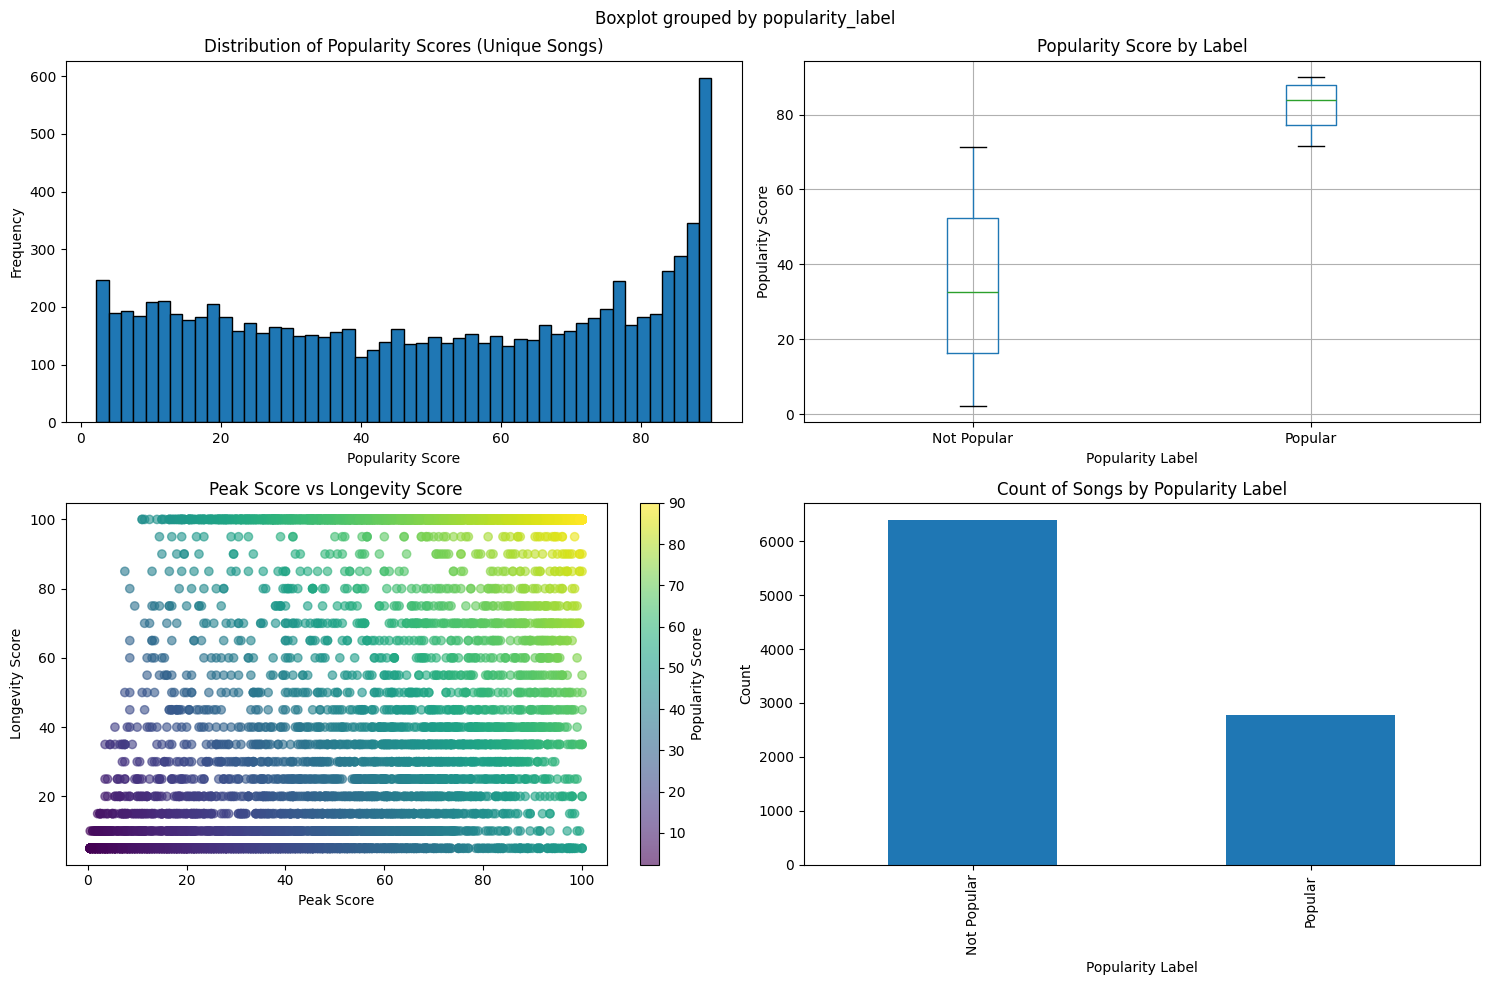

In [8]:
# Visualizations on unique songs
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram of popularity scores
axes[0, 0].hist(song_stats['popularity_score'], bins=50, edgecolor='black')
axes[0, 0].set_title('Distribution of Popularity Scores (Unique Songs)')
axes[0, 0].set_xlabel('Popularity Score')
axes[0, 0].set_ylabel('Frequency')

# Box plot by label
song_stats.boxplot(column='popularity_score', by='popularity_label', ax=axes[0, 1])
axes[0, 1].set_title('Popularity Score by Label')
axes[0, 1].set_xlabel('Popularity Label')
axes[0, 1].set_ylabel('Popularity Score')

# Scatter plot: peak vs longevity
scatter = axes[1, 0].scatter(song_stats['peak_score'], song_stats['longevity_score'], 
                             c=song_stats['popularity_score'], cmap='viridis', alpha=0.6)
axes[1, 0].set_title('Peak Score vs Longevity Score')
axes[1, 0].set_xlabel('Peak Score')
axes[1, 0].set_ylabel('Longevity Score')
plt.colorbar(scatter, ax=axes[1, 0], label='Popularity Score')

# Count plot of labels
song_stats['popularity_label'].value_counts().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Count of Songs by Popularity Label')
axes[1, 1].set_xlabel('Popularity Label')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [9]:
# Merge the labels back to the original dataframe
df_labeled = df.merge(song_stats[['id', 'best_rank', 'weeks_on_chart', 'peak_score', 
                                    'longevity_score', 'popularity_score', 'popularity_label']], 
                      on='id', 
                      how='left')

print(f"Original dataframe shape: {df.shape}")
print(f"Labeled dataframe shape: {df_labeled.shape}")
df_labeled.head()

Original dataframe shape: (467061, 21)
Labeled dataframe shape: (467061, 27)


,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Points (Ind for each Artist/Nat),id,Song URL,Loudness_norm,best_rank,weeks_on_chart,peak_score,longevity_score,popularity_score,popularity_label
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5.176,0.033,0.483,0.000,...,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,0.849862,1,5,100.0,25.0,65.00,Popular
1,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4.019,0.061,0.143,0.629,...,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,0.883423,1,2,100.0,10.0,56.00,Popular
2,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5.678,0.333,0.213,0.000,...,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,0.835301,2,10,99.5,50.0,79.75,Popular
3,4,Cupid - Twin Ver.,FIFTY FIFTY,2023-05-29,0.783,0.592,-8.332,0.033,0.435,0.000,...,197.0,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,0.758318,3,8,99.0,40.0,73.50,Popular
4,5,un x100to,"Grupo Frontera, Bad Bunny",2023-05-29,0.569,0.724,-4.076,0.047,0.228,0.000,...,98.0,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,0.881769,1,6,100.0,30.0,68.00,Popular


In [10]:
# Save the complete labeled dataset (all rows with weekly data)
df_labeled.to_csv('spotify_data_labeled_complete.csv', sep=';', index=False)
print(f"✓ Saved complete labeled dataset: {len(df_labeled)} rows")

# Save unique songs with statistics (for ML modeling)
song_stats.to_csv('label_data2.csv', sep=';', index=False)
print(f"✓ Saved song statistics: {len(song_stats)} unique songs")

print("\nDatasets saved successfully!")
print("\nNext steps:")
print("1. Use 'label_data2.csv' for basic statistics and analysis")
print("2. Merge with audio features for ML modeling")
print("3. Or use 'spotify_data_labeled_complete.csv' if you need weekly chart data")

✓ Saved complete labeled dataset: 467061 rows
✓ Saved song statistics: 9161 unique songs

Datasets saved successfully!

Next steps:
1. Use 'label_data2.csv' for basic statistics and analysis
2. Merge with audio features for ML modeling
3. Or use 'spotify_data_labeled_complete.csv' if you need weekly chart data


In [11]:
# Create ML-ready dataset with audio features and labels
# Get one row per song with all features
ml_ready = df.groupby('id').first().reset_index()

# Merge with song_stats to get labels
ml_ready = ml_ready.merge(song_stats[['id', 'best_rank', 'weeks_on_chart', 'peak_score', 
                                       'longevity_score', 'popularity_score', 'popularity_label']], 
                          on='id', 
                          how='inner')

# Select relevant columns for ML
feature_columns = ['id', 'Title', 'Artists', 'Danceability', 'Energy', 'Loudness', 
                   'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 
                   '# of Artist', '# of Nationality', 'Loudness_norm',
                   'best_rank', 'weeks_on_chart', 'peak_score', 'longevity_score',
                   'popularity_score', 'popularity_label']

ml_ready = ml_ready[feature_columns]

# Save the ML-ready dataset
ml_ready.to_csv('ml_ready_with_features.csv', sep=';', index=False)
print(f"✓ Saved ML-ready dataset with features: {len(ml_ready)} unique songs")
print(f"✓ Columns: {ml_ready.columns.tolist()}")

ml_ready.head()

✓ Saved ML-ready dataset with features: 9161 unique songs
✓ Columns: ['id', 'Title', 'Artists', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', '# of Artist', '# of Nationality', 'Loudness_norm', 'best_rank', 'weeks_on_chart', 'peak_score', 'longevity_score', 'popularity_score', 'popularity_label']


,id,Title,Artists,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,# of Nationality,Loudness_norm,best_rank,weeks_on_chart,peak_score,longevity_score,popularity_score,popularity_label
0,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),ZAYN,0.748,0.627,-6.029,0.064,0.131,0.0,0.524,Artist 1,Nationality 1,0.825120,40,17,80.5,85.0,91.25,Popular
1,003VDDA7J3Xb2ZFlNx7nIZ,YELL OH,"Trippie Redd, Young Thug",0.842,0.578,-6.050,0.138,0.004,0.0,0.190,Artist 1,Nationality 1,0.824511,108,0,46.5,0.0,23.25,Not Popular
2,003eoIwxETJujVWmNFMoZy,Growing Pains,Alessia Cara,0.353,0.755,-6.276,0.733,0.082,0.0,0.437,Artist 1,Nationality 1,0.817955,91,2,55.0,10.0,33.50,Not Popular
3,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,The Killers,0.352,0.911,-5.230,0.075,0.001,0.0,0.236,Artist 1,Nationality 1,0.848296,73,80,64.0,100.0,92.00,Popular
4,00B7TZ0Xawar6NZ00JFomN,Best Life (feat. Chance The Rapper),Cardi B,0.620,0.625,-7.438,0.553,0.287,0.0,0.665,Artist 1,Nationality 1,0.784249,61,2,70.0,10.0,41.00,Not Popular
